### Part A

# Library Imports

In [70]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import warnings
from xgboost import plot_importance

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
AENERGY=pd.read_csv("/content/drive/MyDrive/CE802_P2_Data.csv")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_colwidth", 500)

# Data Understanding

Starting off, we will see the distribution of our columns

We can see some columns with mean and max varying by a lot, that could signify presence of outliers, but we won't handle them right away. 
Example: See column F10 (193598 is the max but mean is only 35436)


In [ ]:
AENERGY.describe(include="all")

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506
mean,0.507000,183.864599,-3924.895867,4.778608,-2538.698490,11.563792,-3.004358,-5.435266,5161.847898,35436.452131,-2.878000,9025.612611,-3.297873,0.481000,0.614264,11.735125,-1931.272785,-7.410040,-4384.216246,-15.902875,-49.360560,NaN
std,0.500201,20.571395,1037.177844,0.901204,702.890861,1.842535,0.869678,0.899919,1494.941683,5064.689411,0.998816,1058.036210,0.902763,0.499889,0.671938,14.584924,493.077434,2.560369,1534.747192,2.708330,3.188244,NaN
min,0.000000,163.564660,-8482.260000,3.842990,-6268.740000,9.241776,-6.595000,-8.862000,-4799.760000,24137.130000,-3.820000,2731.260000,-6.832000,0.000000,0.130001,-45.780000,-5111.540000,-18.069000,-14823.750000,-26.394000,-59.670000,NaN
25%,0.000000,169.944000,-4325.040000,4.101825,-2819.817500,10.103100,-3.389500,-5.918250,5000.140000,35234.025000,-3.820000,8615.560000,-3.694250,0.000000,0.173685,2.510250,-1958.215000,-8.505000,-4790.850000,-17.140500,-51.585000,NaN
50%,1.000000,177.724000,-4131.460000,4.497250,-2677.050000,11.162250,-2.749050,-5.144800,5539.140000,35290.473000,-3.820000,8786.950000,-3.013700,0.000000,0.363600,11.850150,-1823.600000,-6.596250,-4417.084500,-15.066750,-49.215000,NaN
75%,1.000000,189.465000,-3811.385000,5.147000,-2445.365000,12.703500,-2.353325,-4.733575,5792.546500,35348.460000,-1.820000,9097.260000,-2.626475,1.000000,0.769525,20.939250,-1757.457500,-5.517000,-3982.050000,-13.822350,-47.160000,NaN


Correlation with target value with raw dataset 


It is interesting to see that F21 is so heavily negatively correlated

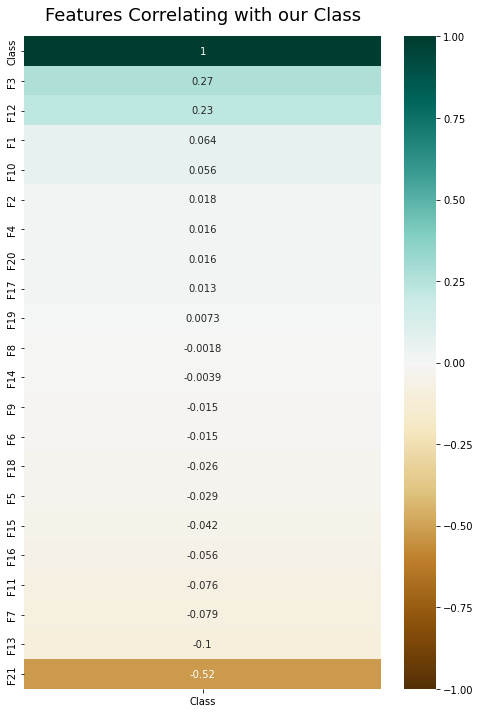

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(AENERGY.corr()[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with our Class', fontdict={'fontsize':18}, pad=16);

We will use LabelEncoder from sklearn for converting the boolean string class of True/False

In [ ]:
le = LabelEncoder()
AENERGY['Class'] = le.fit_transform(AENERGY["Class"])

We should check data distribution in more detail next

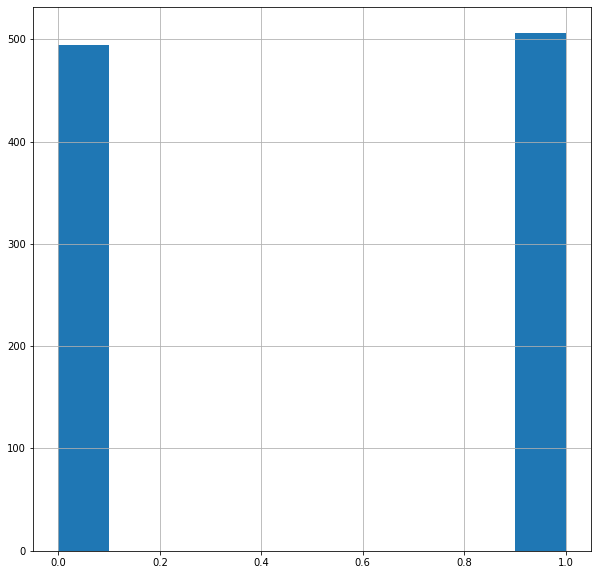

In [ ]:
AENERGY['Class'].hist(figsize = (10,10))
plt.show()  
#we can see that our distribution is balanced, this is very good.
#we won't have to use class_weights to amplify one class because of less representation

In [ ]:
#initially discard all missing values?
print(len(AENERGY))


1000


In [ ]:
print(AENERGY.isnull().sum()) #checking for null values
#interesting, we only have one column that has missing values...

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21      500
Class      0
dtype: int64


In [ ]:
#Dropping first, will make use later.
AENERGY.dropna(inplace=True)

**We understand so far that:**

*   Our features are continious

*   Some of them tend to be negative (it would be interesting to test different scaling methods for different features and all for all impact)
only one feature, F21 is missing 50%, but we cannot drop it as it is essential 
   
*   seemingly due to such a heavy negative correlation. (KNN Impute is where my mind is going to after normalizing data to reduce the noise and variance)


*   Classes are balanced



*   Outliers are definetly present (mean-max difference is significant with few features)






We will now look at the whole of data to figure out what other patterns emerge.
Starting off, we see distribution of all features to see abnormalities and the general direction in which they find themselves in

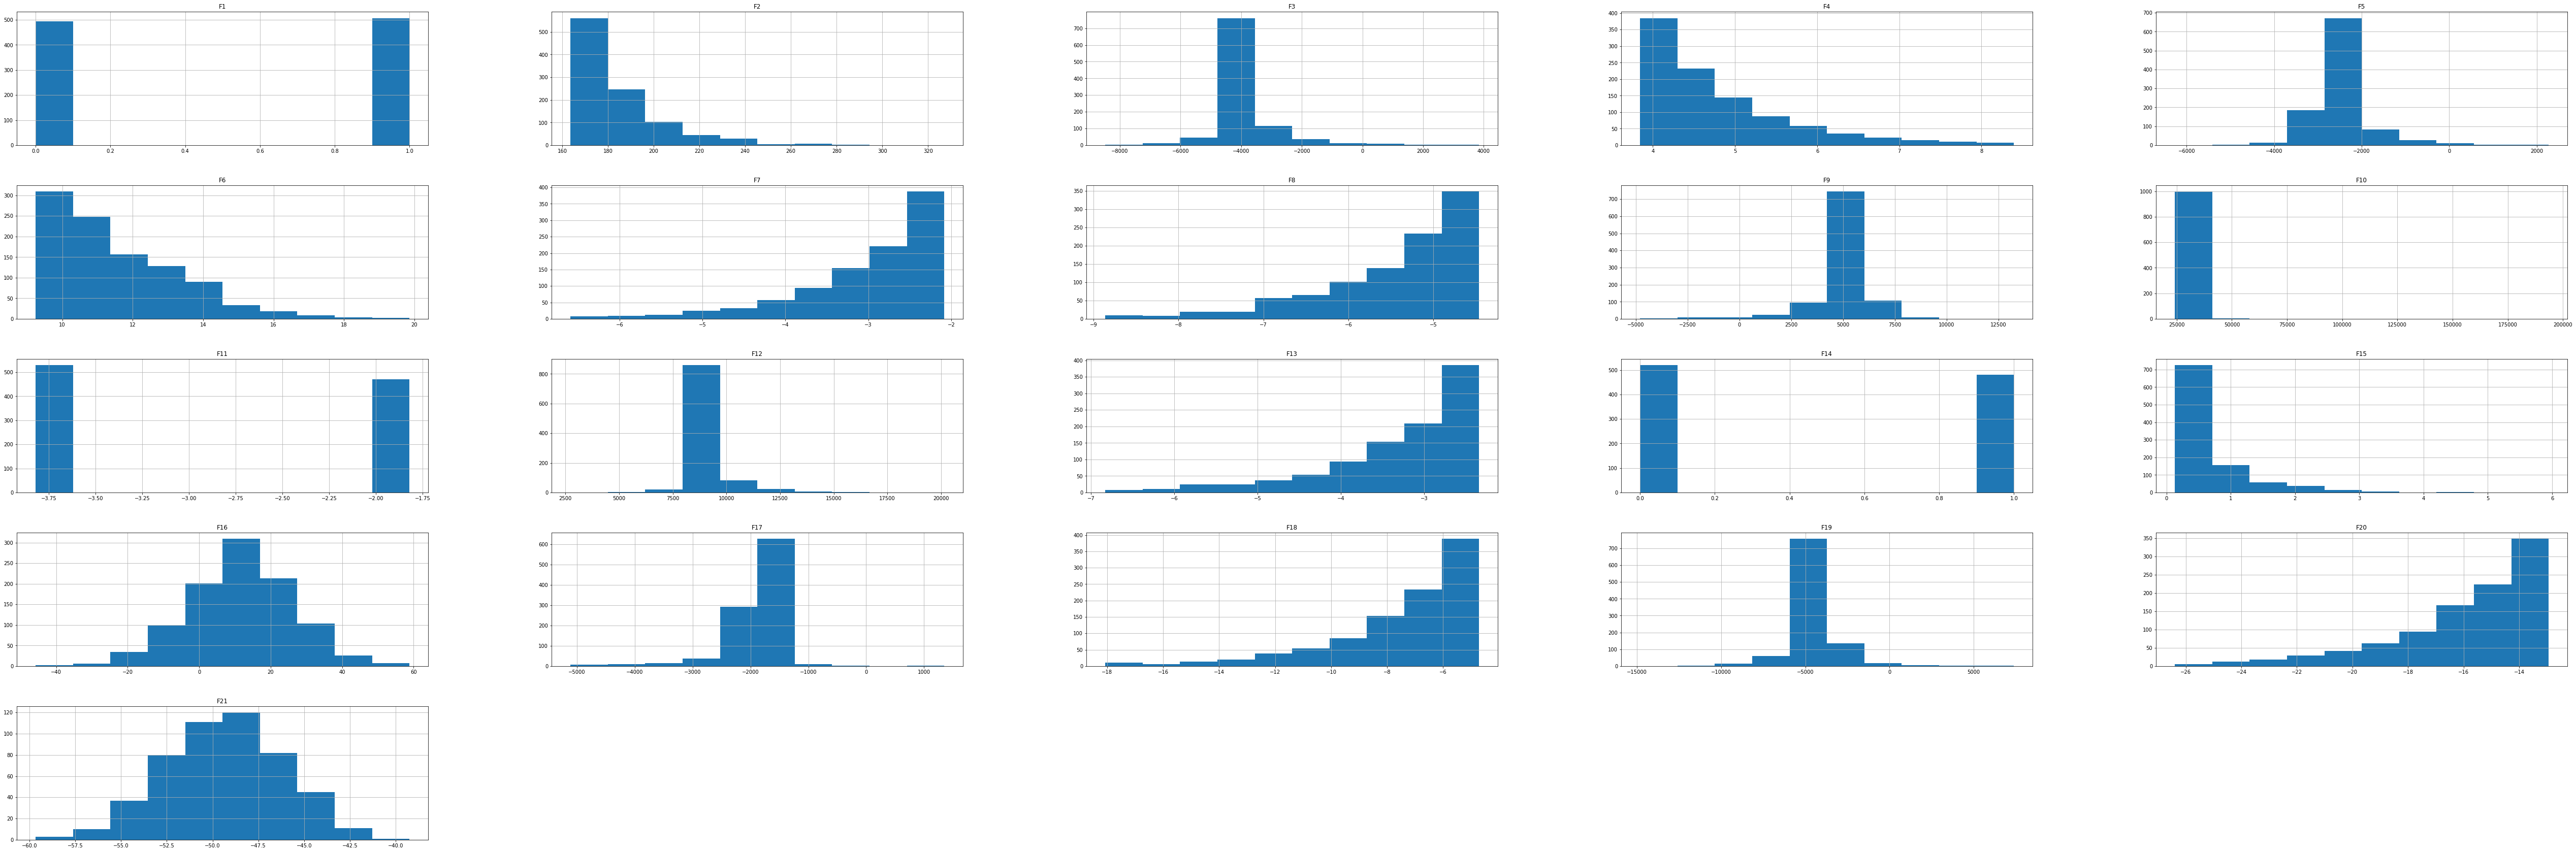

In [ ]:
AENERGY.hist(figsize = (90,30))
plt.show()

Next, let us see correlation between features, as before we saw with respect to the label.

<ipython-input-9-200a3b4cfdd9>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(AENERGY.corr(), dtype=np.bool))


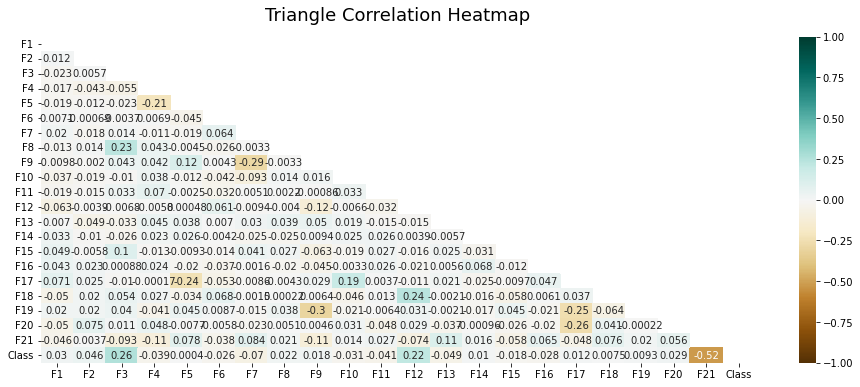

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(AENERGY.corr(), dtype=np.bool))
heatmap = sns.heatmap(AENERGY.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

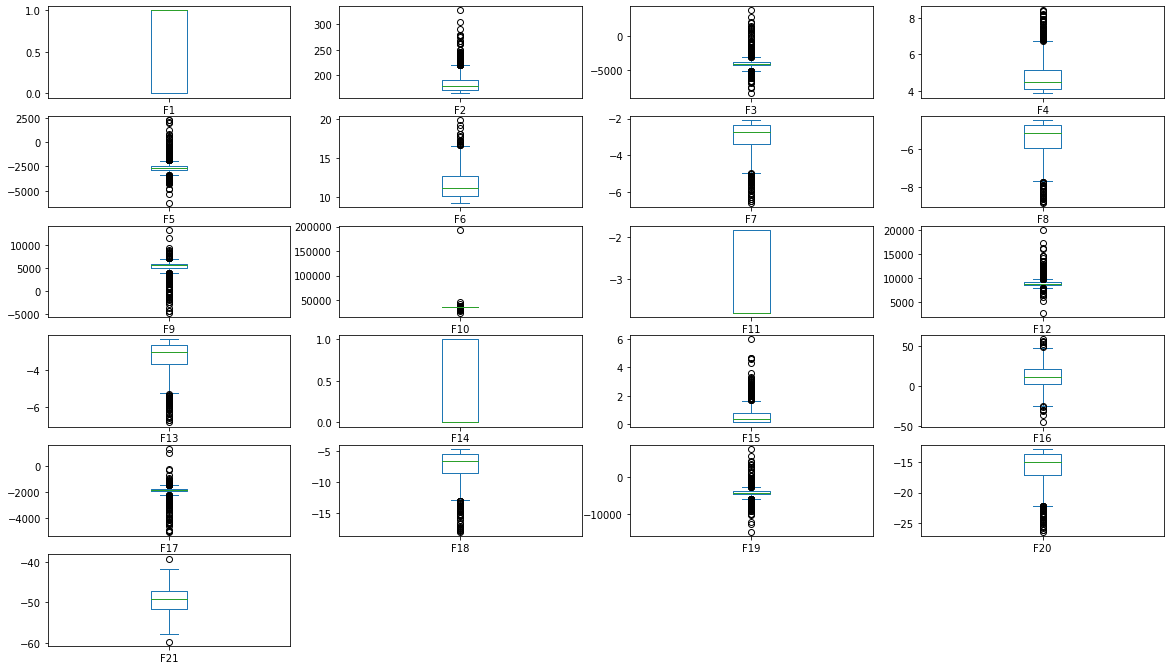

In [ ]:
#Furthering the effort of outlier detection, lets use box plots.
AENERGY.plot(kind='box', subplots=True, figsize=(20, 40),layout=(20,4))
plt.show()
#While we can see outliers present, it is better to do this again after having normalized columns so ranges are better.

# Approach:


*   Apply all algorithms on default with missing values dropped
*   Apply data transformation and handle missing values
*   Apply all algorithms on default and utilize GridSearchCV and pipeline for best models
*   Ensemble them for final prediction.







# Raw Modelling

We can completely run all algorithms with missing values dropped first to see what kind of results will we get, and then get to good manners and handle misisng values, watch out for outliers, and perform data transformations if seen fit.

In [ ]:
AENERGY.describe(include="all")
# we can see F10 losing the max-mean difference we saw above

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.510000,184.106758,-3938.709518,4.816661,-2548.810697,11.577371,-3.014068,-5.436238,5101.748498,35273.515352,-2.812000,9030.634337,-3.289336,0.484000,0.622034,12.062168,-1908.882655,-7.385593,-4439.189473,-16.033165,-49.360560,0.502000
std,0.500401,21.344893,918.500985,0.934030,704.172002,1.891114,0.891158,0.887085,1565.186161,807.623751,1.000969,1018.662123,0.879256,0.500244,0.689143,14.737235,433.900868,2.447946,1416.933822,2.770684,3.188244,0.500497
min,0.000000,163.575350,-7615.260000,3.842990,-4825.740000,9.241776,-6.507000,-8.795000,-4499.760000,24137.130000,-3.820000,6485.260000,-6.400000,0.000000,0.130005,-45.780000,-4465.540000,-17.871000,-14823.750000,-26.079000,-59.670000,0.000000
25%,0.000000,169.566500,-4329.037500,4.106550,-2820.355000,10.084725,-3.340500,-5.910750,4965.990000,35233.695000,-3.820000,8614.710000,-3.705750,0.000000,0.179810,2.835000,-1960.455000,-8.505000,-4766.400000,-17.166000,-51.585000,0.000000
50%,1.000000,177.611000,-4130.960000,4.519850,-2686.725000,11.163000,-2.746950,-5.125200,5529.340000,35288.711500,-1.820000,8792.140000,-2.993250,0.000000,0.350300,11.930100,-1824.140000,-6.674100,-4402.444500,-15.256800,-49.215000,1.000000
75%,1.000000,191.155000,-3808.960000,5.221000,-2457.415000,12.654750,-2.350525,-4.783950,5792.828000,35345.955000,-1.820000,9078.260000,-2.635750,1.000000,0.759100,21.909000,-1758.832000,-5.517000,-3979.500000,-13.893075,-47.160000,1.000000
max,1.000000,327.120000,2054.740000,8.395000,2276.260000,19.863000,-2.083370,-4.462710,8432.240000,42722.130000,-1.820000,20155.260000,-2.345150,1.000000,4.639000,57.330000,1350.460000,-4.718190,3341.250000,-12.936360,-39.240000,1.000000


In [ ]:
len(AENERGY.dropna())
#we will lost half the data though.

500

Lets start with a Decision Tree classifier, nothing fancy, no finetuning, just straight away testing what it would do with our data

In [ ]:
df=AENERGY.copy(deep=True)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Class"), df["Class"], test_size=0.3)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
train_score = model.score(X_train,y_train)
print("Train set score:", round(train_score,3))
test_score = model.score(X_test, y_test)
print("Test set score:", round(test_score,3))

Train set score: 1.0
Test set score: 0.747


getting a score of 1 on train means we have overfitted, we need to fix this

Now, we will try KNN, another classification algorithm that can utilize the count of attributes matching for figuring out the discrimination factor.

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
train_score = knn_model.score(X_train,y_train)
print("Train set score:", round(train_score,2))
test_score = knn_model.score(X_test, y_test)
print("Test set score:", round(test_score,3))

Train set score: 0.73
Test set score: 0.58


Finally, lets try SVM; one of the most popular algorithms with non linear kernels also, it was rampant before the rise of Deep Learning.


In [ ]:

SVM_model = SVC()
SVM_model.fit(X_train, y_train)
predictions = SVM_model.predict(X_test)
print(classification_report(y_test, predictions))
print("Train Score: ",SVM_model.score(X_train,y_train))
print("Test Score: ",SVM_model.score(X_test,y_test))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        79
        True       0.47      1.00      0.64        71

    accuracy                           0.47       150
   macro avg       0.24      0.50      0.32       150
weighted avg       0.22      0.47      0.30       150

Train Score:  0.5142857142857142
Test Score:  0.47333333333333333


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Data Transformation & Missing Values**

In [ ]:
print(len(AENERGY))

1000


In [ ]:
def custom_normalizer(AENERGY):
  df=AENERGY.copy(deep=True)
  # Select the non-negative columns
  non_negative_columns = df.columns[df.ge(0).all()]
  df = df[non_negative_columns]

  # Normalize the columns between 0 and 1
  scaler = MinMaxScaler()
  df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
  df_normalized.head()

  df=AENERGY.copy(deep=True)
  # Select the negative columns
  negative_columns = df.columns[df.lt(0).any()]
  df = df[negative_columns]

  # Normalize the columns between -1 and 1
  scaler = MinMaxScaler(feature_range=(-1, 1))
  df_normalized_2 = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

  df = pd.concat([df_normalized, df_normalized_2], axis=1)

  class_column = df["Class"]
  other_columns = df.drop("Class", axis=1)

  # Sort the other columns by the integers in them
  other_columns = other_columns.apply(lambda x: x.sort_values())

  # Concatenate the class column and the sorted other columns
  df = pd.concat([other_columns, class_column], axis=1)

  return df 

df=custom_normalizer(AENERGY)

df.head()


,F1,F2,F4,F6,F10,F12,F14,F15,F3,F5,F7,F8,F9,F11,F13,F16,F17,F18,F19,F20,F21,Class
0,1.0,0.003823,0.253736,0.367869,0.065419,0.369272,0.0,0.013824,-0.301932,-0.129526,0.876404,0.660811,0.123307,1.0,0.169317,0.564908,-0.072300,0.624994,-0.069360,0.930234,-0.077827,0.0
1,1.0,0.215923,0.102089,0.526891,0.066200,0.449552,0.0,0.000648,-0.198832,-0.177873,-0.172572,0.743118,0.174545,-1.0,0.314981,0.260436,0.066159,0.960370,-0.083098,0.741910,-0.386197,1.0
2,0.0,0.109121,0.266698,0.037766,0.086179,0.339896,0.0,0.130818,-0.308079,-0.174191,0.946250,0.666538,-0.019262,1.0,0.349281,0.095120,0.029100,-0.600154,-0.053036,-0.456071,NaN,0.0
3,0.0,0.045913,0.121751,0.012789,0.066062,0.401205,0.0,0.104503,-0.055474,-0.193442,0.926617,0.962633,0.082168,-1.0,-0.488173,0.265654,0.046512,0.898192,-0.068187,0.232757,-0.215859,1.0
4,0.0,0.072754,0.004998,0.269435,0.060081,0.332534,1.0,0.019543,0.050122,-0.104295,-0.032969,0.938181,0.192266,1.0,0.145263,-0.051147,0.042167,0.910592,-0.089330,-0.175636,-0.212922,1.0


In [ ]:
len(df)

500

In [ ]:
#would the normalization be different if we did it inclusive of null values?
#lets find out
AENERGY=pd.read_csv("/content/drive/MyDrive/CE802_P2_Data.csv")
df_nan=custom_normalizer(AENERGY)
df_nan.head()

,F1,F2,F4,F6,F10,F12,F14,F15,F3,F5,F7,F8,F9,F11,F13,F16,F17,F18,F19,F20,F21,Class
0,1.0,0.003823,0.253736,0.367869,0.065419,0.369272,0.0,0.013824,-0.301932,-0.129526,0.876404,0.660811,0.123307,1.0,0.169317,0.564908,-0.072300,0.624994,-0.069360,0.930234,-0.077827,0.0
1,1.0,0.215923,0.102089,0.526891,0.066200,0.449552,0.0,0.000648,-0.198832,-0.177873,-0.172572,0.743118,0.174545,-1.0,0.314981,0.260436,0.066159,0.960370,-0.083098,0.741910,-0.386197,1.0
2,0.0,0.109121,0.266698,0.037766,0.086179,0.339896,0.0,0.130818,-0.308079,-0.174191,0.946250,0.666538,-0.019262,1.0,0.349281,0.095120,0.029100,-0.600154,-0.053036,-0.456071,NaN,0.0
3,0.0,0.045913,0.121751,0.012789,0.066062,0.401205,0.0,0.104503,-0.055474,-0.193442,0.926617,0.962633,0.082168,-1.0,-0.488173,0.265654,0.046512,0.898192,-0.068187,0.232757,-0.215859,1.0
4,0.0,0.072754,0.004998,0.269435,0.060081,0.332534,1.0,0.019543,0.050122,-0.104295,-0.032969,0.938181,0.192266,1.0,0.145263,-0.051147,0.042167,0.910592,-0.089330,-0.175636,-0.212922,1.0


Text(0.5, 1.0, 'custom_normalization')

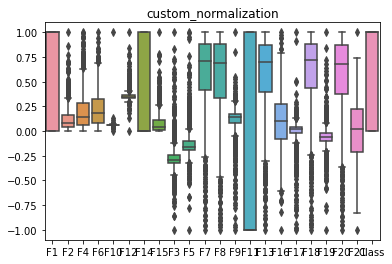

In [ ]:
sns.boxplot(data=df)
plt.title('custom_normalization')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F4      1000 non-null   float64
 3   F6      1000 non-null   float64
 4   F10     1000 non-null   float64
 5   F12     1000 non-null   float64
 6   F14     1000 non-null   float64
 7   F15     1000 non-null   float64
 8   F3      1000 non-null   float64
 9   F5      1000 non-null   float64
 10  F7      1000 non-null   float64
 11  F8      1000 non-null   float64
 12  F9      1000 non-null   float64
 13  F11     1000 non-null   float64
 14  F13     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
 21  Class   1000 non-null   float64
dtypes

## Multiple Normalization Methods

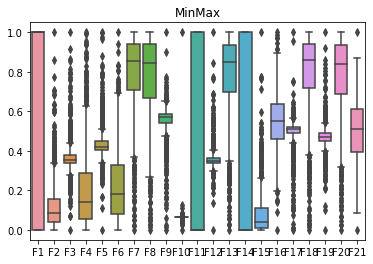

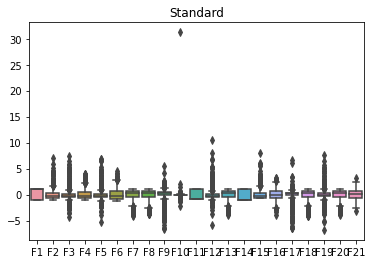

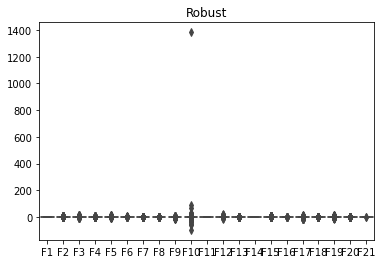

In [4]:
# Read in the DataFrame
df = pd.read_csv("/content/drive/MyDrive/CE802_P2_Data.csv")

# Define the different normalization methods to be used
normalization_methods = {'MinMax': MinMaxScaler(),
                        'Standard': StandardScaler(),
                        'Robust': RobustScaler()}

# Create a dictionary to store the DataFrames
df_norms = {}

# Loop through the normalization methods
for method_name, method in normalization_methods.items():
    # Create a new DataFrame to store the normalized data
    df_norm = pd.DataFrame(method.fit_transform(df.drop(['Class'], axis=1)),columns=df.drop(['Class'], axis=1).columns)
    # Add the class column to the new DataFrame
    df_norm['Class'] = df['Class']
    # store the dataframe in a dictionary
    df_norms[method_name] = df_norm
    # Plot a histogram of the normalized data
    sns.boxplot(data=df_norm.drop(['Class'], axis=1))
    plt.title(method_name)
    plt.show()


From the above, we realize that StandardScaler and Robust are worth experimenting with as we move forward, given the MinMax is not really doing much for our data. Custom Normalization is also seemingly less effective from what we see in visualizations above.

## Multiple Impute Methods

In all scenarios, F21 manages to remain highly negatively correlated throughout the picture, so we need to impute it correctly.
Lets use sklearn KNNImputer to get its value based on all the other columns after normalization so that variance and noise doesnt affect too badly our imputation as 50% of it is missing.

In [5]:
# from sklearn.impute import KNNImputer
# # Selecting the column to impute and the other columns besides it
# col_to_impute = df_nan["F21"]
# other_cols = df_nan.drop("F21", axis=1)

# # Impute the missing values in the column using the other columns as predictors
# imputer = KNNImputer(n_neighbors=5, weights="uniform")
# col_imputed = imputer.fit_transform(col_to_impute.values.reshape(-1, 1), other_cols)

# # Replace the original column with the imputed column
# df_nan["F21"] = col_imputed

# Create a new dictionary to store the imputed DataFrames
# df_imputed = {}

# for key in df_norms:
#     df_nan = df_norms[key]
#     # Selecting the column to impute and the other columns besides it
#     col_to_impute = df_nan["F21"]
#     other_cols = df_nan.drop("F21", axis=1)

#     # Impute the missing values in the column using the other columns as predictors
#     imputer = KNNImputer(n_neighbors=5, weights="uniform")
#     col_imputed = imputer.fit_transform(col_to_impute.values.reshape(-1, 1), other_cols)

#     # Replace the original column with the imputed column
#     df_nan["F21"] = col_imputed
#     df_imputed[key] = df_nan


# Define the different imputation methods to be used
imputation_methods = {'KNN': KNNImputer(n_neighbors=5, weights="uniform"),
                      'Mean': SimpleImputer(strategy='mean'),
                      'Median': SimpleImputer(strategy='median')}

df_imputed = {}

for key in df_norms:
    df_nan = df_norms[key]
    for method_name, method in imputation_methods.items():
        col_to_impute = df_nan["F21"]
        other_cols = df_nan.drop("F21", axis=1)
        # Create a new DataFrame to store the imputed data
        col_imputed = method.fit_transform(col_to_impute.values.reshape(-1, 1), other_cols)
        # Add the imputed dataframe to a dictionary
        df_nan["F21"] = col_imputed
        df_imputed[key + '_' + method_name] = df_nan



In [ ]:
df_imputed['MinMax_KNN'].head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,1.0,0.003823,0.349034,0.253736,0.435237,0.367869,0.938202,0.830406,0.561654,0.065419,1.0,0.369272,0.584659,0.0,0.013824,0.782454,0.463850,0.812497,0.465320,0.965117,0.461087,False
1,1.0,0.215923,0.400584,0.102089,0.411064,0.526891,0.413714,0.871559,0.587273,0.066200,0.0,0.449552,0.657490,0.0,0.000648,0.630218,0.533080,0.980185,0.458451,0.870955,0.306902,True
2,0.0,0.109121,0.345960,0.266698,0.412905,0.037766,0.973125,0.833269,0.490369,0.086179,1.0,0.339896,0.674640,0.0,0.130818,0.547560,0.514550,0.199923,0.473482,0.271964,0.504623,False
3,0.0,0.045913,0.472263,0.121751,0.403279,0.012789,0.963309,0.981316,0.541084,0.066062,0.0,0.401205,0.255913,0.0,0.104503,0.632827,0.523256,0.949096,0.465906,0.616379,0.392070,True
4,0.0,0.072754,0.525061,0.004998,0.447853,0.269435,0.483516,0.969091,0.596133,0.060081,1.0,0.332534,0.572631,1.0,0.019543,0.474427,0.521083,0.955296,0.455335,0.412182,0.393539,True


# Outlier Removal

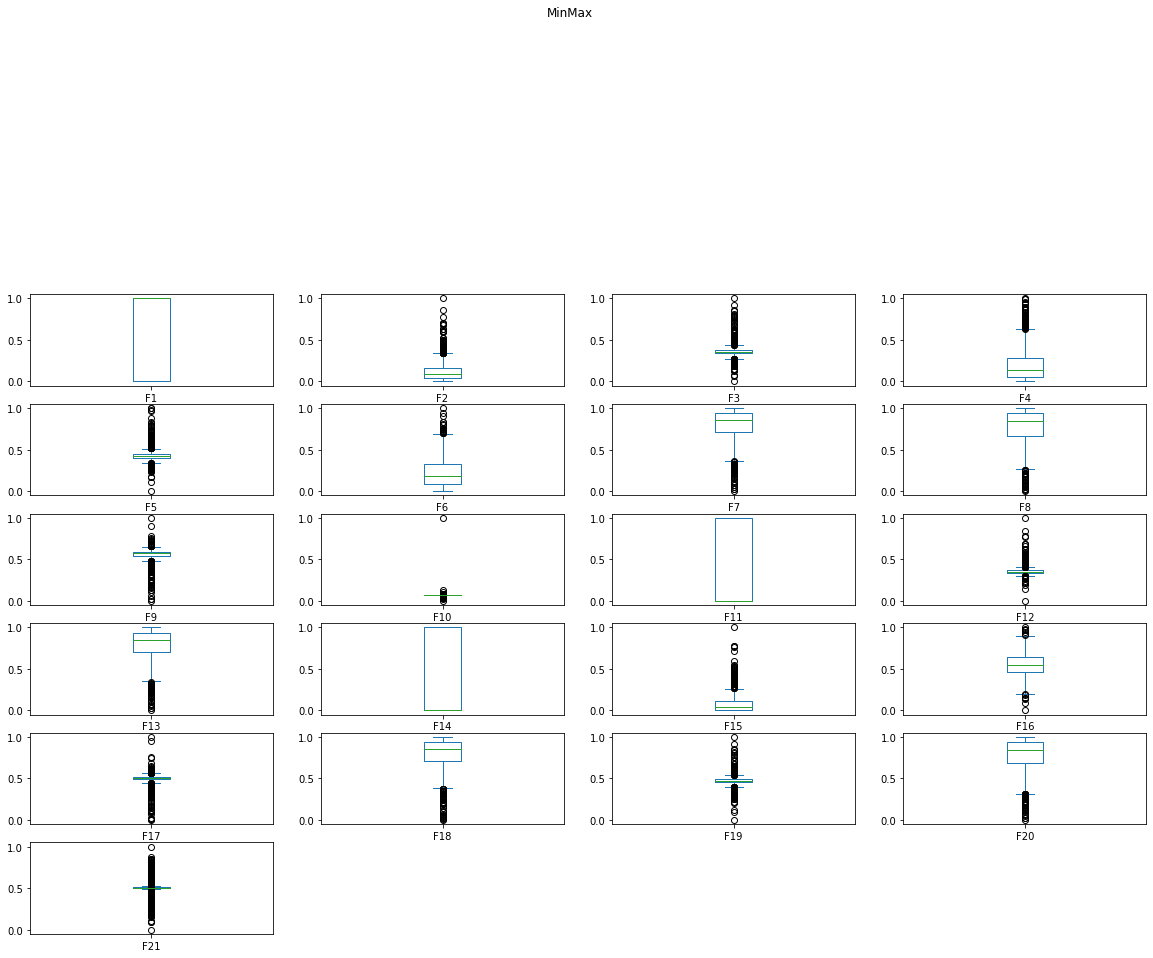

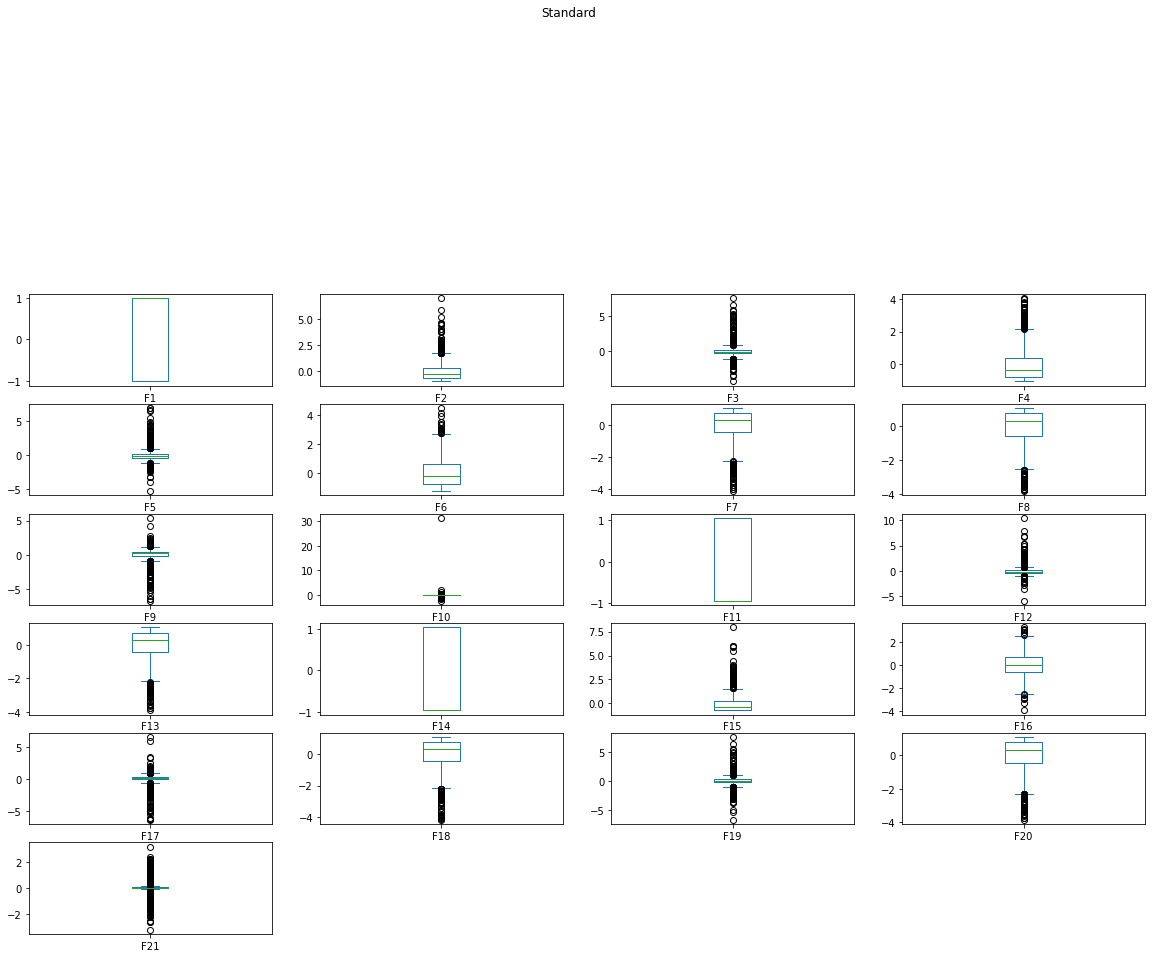

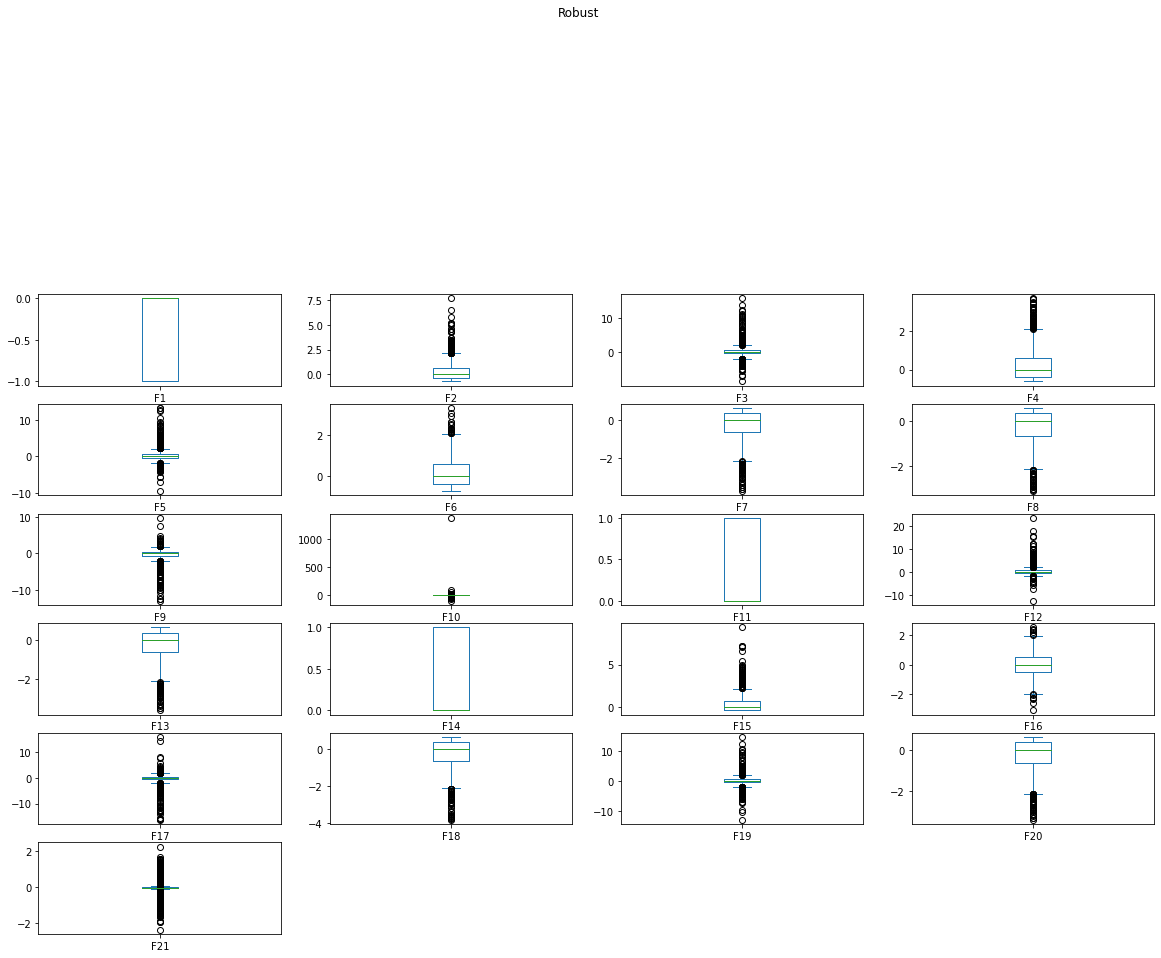

In [ ]:
for key in df_imputed:
    df_imputed[key].drop(['Class'], axis=1).plot(kind='box', subplots=True, figsize=(20, 40), layout=(20, 4))
    plt.suptitle(key)
    plt.show()

Given our data has a box plot with all features well outside of the box on average, it could indicate that there are a large number of anomalies( we already know our classes are balances hence this phenonema) present in the data. In this case:

* Isolation Forest: Isolation Forest is an unsupervised machine learning 
algorithm that is used to identify outliers in the data. It works by  randomly selecting a feature and then randomly selecting a split value between the minimum and maximum values of the selected feature. The algorithm then splits the dataset into smaller and smaller subsets, and assigns an anomaly score to each record based on the number of splits required to isolate it.

*   Local Outlier Factor (LOF): The Local Outlier Factor (LOF) is an unsupervised machine learning algorithm that is used to identify outliers in the data. It works by measuring the local density of the data points and compares it to the density of its nearest neighbors. The algorithm assigns an outlier score to each record, with higher scores indicating that the record is more likely to be an outlier.

*   Robust covariance Estimator: it is used to detect the outliers in the data by assuming that the data follows a Gaussian distribution and identifying the observations that deviate from this distribution. It is less sensitive to the presence of outliers in the data than the traditional covariance estimator.

In this case, since our goal is to predict which customers will have difficulty in paying the electricity bill, it is likely that there will be many anomalies in the data, so using a more robust outlier detection technique like the ones I mentioned above may be more appropriate.

In [6]:
# Create a dictionary to store the dataframes without outliers
df_no_outliers = {}

for key in df_imputed:
    df = df_imputed[key]
    # Isolation Forest
    clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.1),random_state=42)
    clf.fit(df.drop(['Class'], axis=1))
    pred = clf.predict(df.drop(['Class'], axis=1))
    df_out = df[pred == 1]
    df_no_outliers["Isolation Forest " + key] = df_out
    print(f'Isolation Forest removed {len(df) - len(df_out)} outlier rows')

    # Local Outlier Factor
    clf = LocalOutlierFactor(n_neighbors=20, contamination=float(.1))
    pred = clf.fit_predict(df.drop(['Class'], axis=1))
    df_out = df[pred == 1]
    df_no_outliers["Local Outlier Factor " + key] = df_out
    print(f'Local Outlier Factor removed {len(df) - len(df_out)} outlier rows')

    # Robust covariance Estimator
    clf = EllipticEnvelope(contamination=float(.1))
    clf.fit(df.drop(['Class'], axis=1))
    pred = clf.predict(df.drop(['Class'], axis=1))
    df_out = df[pred == 1]
    df_no_outliers["Robust covariance Estimator " + key] = df_out
    print(f'Robust covariance Estimator removed {len(df) - len(df_out)} outlier rows')


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest removed 100 outlier rows
Local Outlier Factor removed 100 outlier rows
Robust covariance Estimator removed 100 outlier rows


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest removed 100 outlier rows
Local Outlier Factor removed 100 outlier rows
Robust covariance Estimator removed 100 outlier rows


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest removed 100 outlier rows
Local Outlier Factor removed 100 outlier rows
Robust covariance Estimator removed 100 outlier rows


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest removed 100 outlier rows
Local Outlier Factor removed 100 outlier rows
Robust covariance Estimator removed 100 outlier rows


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest removed 100 outlier rows
Local Outlier Factor removed 100 outlier rows
Robust covariance Estimator removed 100 outlier rows


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest removed 100 outlier rows
Local Outlier Factor removed 100 outlier rows
Robust covariance Estimator removed 100 outlier rows


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest removed 100 outlier rows
Local Outlier Factor removed 100 outlier rows
Robust covariance Estimator removed 100 outlier rows


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest removed 100 outlier rows
Local Outlier Factor removed 100 outlier rows
Robust covariance Estimator removed 100 outlier rows


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest removed 100 outlier rows
Local Outlier Factor removed 100 outlier rows
Robust covariance Estimator removed 100 outlier rows


In [ ]:
outliers_isolation = set(df_imputed[key].index.difference(df_no_outliers['Isolation Forest '+ key].index))
outliers_lof = set(df_imputed[key].index.difference(df_no_outliers['Local Outlier Factor '+ key].index))
outliers_robust = set(df_imputed[key].index.difference(df_no_outliers['Robust covariance Estimator '+ key].index))

# Find the common outliers
common_outliers = outliers_isolation.intersection(outliers_lof)
print(f'Number of common outliers: {len(common_outliers)}')

common_outliers = outliers_isolation.intersection(outliers_robust)
print(f'Number of common outliers: {len(common_outliers)}')


# Find the common outliers
common_outliers = outliers_robust.intersection(outliers_lof)
print(f'Number of common outliers: {len(common_outliers)}')


Number of common outliers: 48
Number of common outliers: 41
Number of common outliers: 62


While all the outlier removers removed an equal amount:100, we know from above that the removed elements werent all the same.
And the most common outliers taken out were by Robust and Local Outlier Factor

Finally, lets run the next two code blocks multiple times to see which approach is performing best for us and then, we will begin training and finetuning and evaluating our models.

In [ ]:
le = LabelEncoder()
df_no_outliers['Robust covariance Estimator MinMax']['Class'] = le.fit_transform(df_no_outliers['Robust covariance Estimator Robust']["Class"])
X_train, X_test, y_train, y_test = train_test_split(df_no_outliers['Robust covariance Estimator Robust'].drop(columns="Class"), df_no_outliers['Robust covariance Estimator Robust']['Class'], test_size=0.3)

KeyError: ignored

Testing Hypothesis with DT

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
train_score = model.score(X_train,y_train)
print("Train set score:", round(train_score,3))
test_score = model.score(X_test, y_test)
print("Test set score:", round(test_score,3))

#after tuning dt a bit due to overfitting above. -- manual
#after multiple attempts, min_samples_split was most useful for reducing overfitting.
model = DecisionTreeClassifier(random_state=42,min_samples_split=5,max_depth=2)
model.fit(X_train, y_train)
train_score = model.score(X_train,y_train)
print("Train set score:", round(train_score,3))
test_score = model.score(X_test, y_test)
print("Test set score:", round(test_score,3))
#But we see a reduction in our test accuracy as well, is there a better approach?

Train set score: 1.0
Test set score: 0.848
Train set score: 0.757
Test set score: 0.663


## Outlier + Normalization Selection

We can see from below that Local Outlier Factor with Standard Normalization is the better approach to move forward with, but because all models respond differently to this, we will still apply all of it on all of them to select the best models

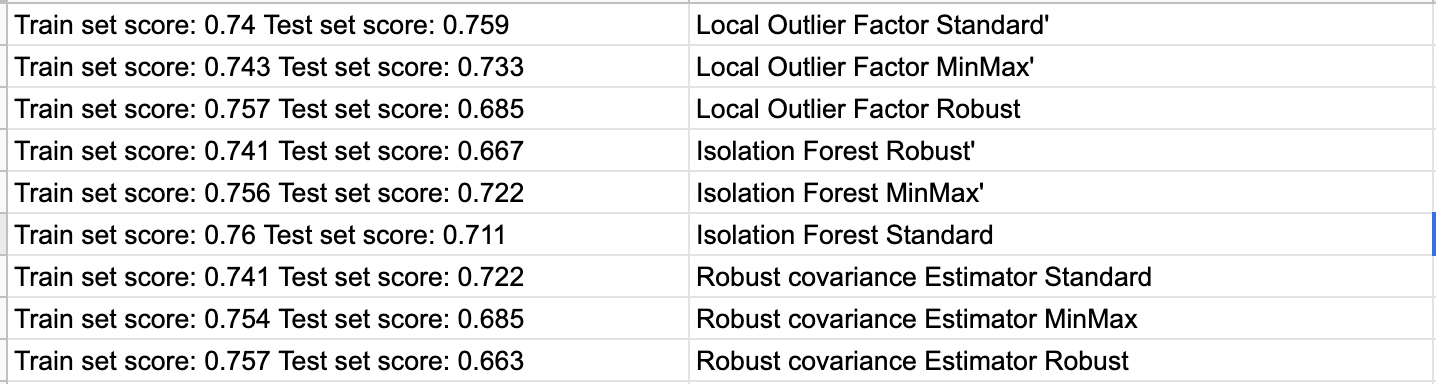

# Training & Finetuning

## Default Model Training

In [7]:
# Define the models
le = LabelEncoder()
models = {'XGBoost': XGBClassifier(),
          'SVM': SVC(),
          'MLP': MLPClassifier(),
          'Logistic Regression': LogisticRegression(),
          'Random Forest': RandomForestClassifier()}

# Create a list to store the results
results_list = []

for key in df_no_outliers:
    df_no_outliers[key]['Class'] = le.fit_transform(df_no_outliers[key]["Class"])
    X_train, X_test, y_train, y_test = train_test_split(df_no_outliers[key].drop("Class", axis=1), df_no_outliers[key]["Class"], test_size=0.2, random_state=42)
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate the accuracy & other metrics
        accuracy_train = model.score(X_train, y_train)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        # Appending
        results_list.append({'Normalization & Outlier & Imputer': key,'Model': name,"Accuracy_Train": accuracy_train ,'Accuracy_test': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'Confusion Matrix': cm})

# Convert to df
results_df = pd.DataFrame(results_list)


<ipython-input-7-ade44cea7bcd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[key]['Class'] = le.fit_transform(df_no_outliers[key]["Class"])
<ipython-input-7-ade44cea7bcd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[key]['Class'] = le.fit_transform(df_no_outliers[key]["Class"])
<ipython-input-7-ade44cea7bcd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [ ]:
results_df.sort_values(by=['F1-score'],ascending=False)

,Normalization & Outlier & Imputer,Model,Accuracy_Train,Accuracy_test,Precision,Recall,F1-score,Confusion Matrix
125,Local Outlier Factor Robust_Median,XGBoost,0.963889,0.894444,0.879630,0.940594,0.909091,"[[66, 13], [6, 95]]"
95,Local Outlier Factor Robust_KNN,XGBoost,0.963889,0.894444,0.879630,0.940594,0.909091,"[[66, 13], [6, 95]]"
110,Local Outlier Factor Robust_Mean,XGBoost,0.963889,0.894444,0.879630,0.940594,0.909091,"[[66, 13], [6, 95]]"
55,Robust covariance Estimator Standard_KNN,XGBoost,0.963889,0.900000,0.871287,0.946237,0.907216,"[[74, 13], [5, 88]]"
10,Robust covariance Estimator MinMax_KNN,XGBoost,0.963889,0.900000,0.871287,0.946237,0.907216,"[[74, 13], [5, 88]]"
...,...,...,...,...,...,...,...,...
38,Local Outlier Factor MinMax_Median,Logistic Regression,0.737500,0.677778,0.673684,0.703297,0.688172,"[[58, 31], [27, 64]]"
1,Isolation Forest MinMax_KNN,SVM,0.787500,0.672222,0.711111,0.659794,0.684492,"[[57, 26], [33, 64]]"
16,Isolation Forest MinMax_Mean,SVM,0.787500,0.672222,0.711111,0.659794,0.684492,"[[57, 26], [33, 64]]"
31,Isolation Forest MinMax_Median,SVM,0.787500,0.672222,0.711111,0.659794,0.684492,"[[57, 26], [33, 64]]"


In [ ]:
#df_no_outliers['Local Outlier Factor MinMax_KNN'].head()
df_no_outliers['Local Outlier Factor MinMax_KNN']['Class'].value_counts()

1    459
0    441
Name: Class, dtype: int64

Looking at the results above, it is interesting to note that the difference between imputation is not noticeable, and we could pick one over the other without any noticeable difference, at least from the options of imputer method selected.

## Parameter Search - Finetuning

In [34]:
warnings.filterwarnings("ignore", message="User Warning")

# Define the models
models = {'XGBoost': XGBClassifier(),
          'SVM': SVC(),
          'MLP': MLPClassifier(),
          'Logistic Regression': LogisticRegression(),
          'Random Forest': RandomForestClassifier()}

# Create a list to store the results
results_list = []

# Define the param grid for each model
param_grid = {'XGBoost': { 'model__eta': [0.01,0.1, 0.5, 1],
                           'model__max_depth': [2,3, 5, 10],
                           'model__n_estimators': [25,50, 100, 200],      
                           'model__learning_rate': [ 0.01, 0.05, 0.15, 0.30 ],
                           'model__gamma': [ 0.0, 0.1, 0.2, 0.3]},
              
              'SVM': {'model__C': [0.1, 1, 10],
                      'model__kernel': ['linear', 'rbf'],
                      'model__gamma': ['scale','auto'],
                      'model__shrinking':[True,False],
                      'model__probability':[True,False],
                      'model__break_ties':[True,False]},
              
              'MLP': {'model__hidden_layer_sizes': [(3,),(6,),(10,)],
                      'model__activation': ['relu', 'logistic'],
                      'model__max_iter': [15,50,100],
                      'model__shuffle': [True,False],},
              
              'Logistic Regression': {'model__C': [0.1, 1, 10],
                                      'model__solver':['liblinear'],
                                      'model__penalty':['l1','l2'],
                                      'model__fit_intercept': [True,False]},
              
              'Random Forest': {'model__n_estimators': [10,15,20, 50],
                                'model__max_depth': [1, 2, 3, 5],
                                'model__min_samples_split' : [2, 5, 10],
                                'model__min_samples_leaf' : [1, 2, 4],
                                'model__bootstrap': [True, False]}
                                }

for key in df_no_outliers:
    X_train, X_test, y_train, y_test = train_test_split(df_no_outliers[key].drop("Class", axis=1), df_no_outliers[key]["Class"], test_size=0.2, random_state=42)
    for name, model in models.items():
        #using sklearn pipeline to make code more readable
        pipe = Pipeline([('model', model)])

        # GridSearchCV with 5 cross validation ~ could opt for RandomSearch also
        #gs = GridSearchCV(pipe, param_grid[name], cv=5)
        gs = RandomizedSearchCV(
                        pipe,
                        param_distributions= param_grid[name],
                        n_iter=50,
                        cv=10)
        gs.fit(X_train, y_train)
        y_pred = gs.predict(X_test)
        
        # Calculate the accuracy & other metrics
        accuracy_train = gs.score(X_train, y_train)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        # Appending
        results_list.append({'Normalization & Outlier & Imputer': key,'Model': name,"Accuracy_Train": accuracy_train ,'Accuracy_test': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'Confusion Matrix': cm, 'best_params': gs.best_params_,
                             'best_estimator':gs.best_estimator_})

# Convert to df
results_df = pd.DataFrame(results_list)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selecti

In [35]:
results_df.sort_values(by=['F1-score'],ascending=False)[:20]

,Normalization & Outlier & Imputer,Model,Accuracy_Train,Accuracy_test,Precision,Recall,F1-score,Confusion Matrix,best_params,best_estimator
95,Local Outlier Factor Robust_KNN,XGBoost,1.000000,0.911111,0.882883,0.970297,0.924528,"[[66, 13], [3, 98]]","{'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.05, 'model__gamma': 0.1, 'model__eta': 0.5}","(XGBClassifier(eta=0.5, gamma=0.1, learning_rate=0.05, max_depth=5,\n n_estimators=200))"
110,Local Outlier Factor Robust_Mean,XGBoost,1.000000,0.905556,0.875000,0.970297,0.920188,"[[65, 14], [3, 98]]","{'model__n_estimators': 100, 'model__max_depth': 10, 'model__learning_rate': 0.15, 'model__gamma': 0.0, 'model__eta': 0.5}","(XGBClassifier(eta=0.5, gamma=0.0, learning_rate=0.15, max_depth=10))"
80,Local Outlier Factor Standard_Median,XGBoost,1.000000,0.911111,0.896907,0.935484,0.915789,"[[77, 10], [6, 87]]","{'model__n_estimators': 50, 'model__max_depth': 10, 'model__learning_rate': 0.3, 'model__gamma': 0.3, 'model__eta': 1}","(XGBClassifier(eta=1, gamma=0.3, learning_rate=0.3, max_depth=10,\n n_estimators=50))"
50,Local Outlier Factor Standard_KNN,XGBoost,1.000000,0.911111,0.896907,0.935484,0.915789,"[[77, 10], [6, 87]]","{'model__n_estimators': 200, 'model__max_depth': 10, 'model__learning_rate': 0.3, 'model__gamma': 0.3, 'model__eta': 0.1}","(XGBClassifier(eta=0.1, gamma=0.3, learning_rate=0.3, max_depth=10,\n n_estimators=200))"
65,Local Outlier Factor Standard_Mean,XGBoost,1.000000,0.911111,0.896907,0.935484,0.915789,"[[77, 10], [6, 87]]","{'model__n_estimators': 50, 'model__max_depth': 10, 'model__learning_rate': 0.3, 'model__gamma': 0.3, 'model__eta': 1}","(XGBClassifier(eta=1, gamma=0.3, learning_rate=0.3, max_depth=10,\n n_estimators=50))"
100,Robust covariance Estimator Robust_KNN,XGBoost,1.000000,0.911111,0.886598,0.945055,0.914894,"[[78, 11], [5, 86]]","{'model__n_estimators': 200, 'model__max_depth': 10, 'model__learning_rate': 0.05, 'model__gamma': 0.3, 'model__eta': 0.5}","(XGBClassifier(eta=0.5, gamma=0.3, learning_rate=0.05, max_depth=10,\n n_estimators=200))"
55,Robust covariance Estimator Standard_KNN,XGBoost,1.000000,0.905556,0.870000,0.956044,0.910995,"[[76, 13], [4, 87]]","{'model__n_estimators': 200, 'model__max_depth': 10, 'model__learning_rate': 0.05, 'model__gamma': 0.3, 'model__eta': 1}","(XGBClassifier(eta=1, gamma=0.3, learning_rate=0.05, max_depth=10,\n n_estimators=200))"
25,Robust covariance Estimator MinMax_Mean,XGBoost,0.931944,0.905556,0.904255,0.913978,0.909091,"[[78, 9], [8, 85]]","{'model__n_estimators': 100, 'model__max_depth': 5, 'model__learning_rate': 0.01, 'model__gamma': 0.2, 'model__eta': 1}","(XGBClassifier(eta=1, gamma=0.2, learning_rate=0.01, max_depth=5))"
20,Local Outlier Factor MinMax_Mean,XGBoost,1.000000,0.905556,0.902174,0.912088,0.907104,"[[80, 9], [8, 83]]","{'model__n_estimators': 50, 'model__max_depth': 10, 'model__learning_rate': 0.15, 'model__gamma': 0.0, 'model__eta': 1}","(XGBClassifier(eta=1, gamma=0.0, learning_rate=0.15, max_depth=10,\n n_estimators=50))"
5,Local Outlier Factor MinMax_KNN,XGBoost,0.998611,0.905556,0.902174,0.912088,0.907104,"[[80, 9], [8, 83]]","{'model__n_estimators': 25, 'model__max_depth': 10, 'model__learning_rate': 0.15, 'model__gamma': 0.0, 'model__eta': 0.5}","(XGBClassifier(eta=0.5, gamma=0.0, learning_rate=0.15, max_depth=10,\n n_estimators=25))"


From the results gauged above, it is apparent that XGBoost is dominant to the point where every combination of XGBoost is better than every (almost) combination of other models selected, not that the other models aren't performing great, it is just that XGBoost is too good, which makes sense, as even in the industry that I was in, for tabular data, XGBoost is extremely popular for a reason!

#Evaluation Method

I have already calculated F1-Score, Precision, Recall & Train_Test Accuracy above, and after a brief explaination, I will select one over the other (hint: I already have)

F1 Score is the perfect balance in a way; we get to look at both Precision and Recall and only ever reach a perfect score of 1 if both precision and recall are 1. 


*   Recall technically is about all anamolies being identified correctly, 
whereas Precision as the name suggests is about counting only anomalies, in this case whether the identification of difficulty with paying electricty bill was done correctly classified and how many times was that the case (True Positive/True+False (Positives))


*   Simply Said; High precision means that the model is good at avoiding false positives, and High Recall means that the model is good at detecting all the positive instances.


*   Given our dataset is almost perfectly balanced, accuracy too is a good enough metric to judge the performance, but I will go with F1 first, and then with Recall, Precision and Train-Test Accuracy gap will be kept in mind, as we do not want a 100% train and a 91% Test when we can pick 94% Train and 91% Test Accuracy.

In [45]:
results_df.sort_values(by=['F1-score'],ascending=False)[:1]

,Normalization & Outlier & Imputer,Model,Accuracy_Train,Accuracy_test,Precision,Recall,F1-score,Confusion Matrix,best_params,best_estimator
95,Local Outlier Factor Robust_KNN,XGBoost,1.0,0.911111,0.882883,0.970297,0.924528,"[[66, 13], [3, 98]]","{'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.05, 'model__gamma': 0.1, 'model__eta': 0.5}","(XGBClassifier(eta=0.5, gamma=0.1, learning_rate=0.05, max_depth=5,\n n_estimators=200))"


In [49]:
results_df.rename(columns={'F1-score': 'F1_score'}, inplace=True)

Now, knowing that if the cost of false negatives is higher, then recall should be used as an evaluation metric, and if the cost of false positives is higher, then precision should be used as an evaluation metric, and with AENERGY scenario, we would prefer Precision as we do not want to say a person can pay when they can't, maybe they will lose out on certain elligible cuts or benefits given their condition.

In [52]:
results__= results_df.copy(deep=True)
#results__ = results__.query("Accuracy_Train - Accuracy_test <= 0.05") #avoiding large gaps between Train-Test Accuracy first
results__ = results__.query("F1_score >= 0.90") 
results__ = results__.sort_values(by=['F1_score','Precision','Recall'],ascending=[False,False,False])
results__ = results__.query("Model == 'XGBoost'")
results__

,Normalization & Outlier & Imputer,Model,Accuracy_Train,Accuracy_test,Precision,Recall,F1_score,Confusion Matrix,best_params,best_estimator
95,Local Outlier Factor Robust_KNN,XGBoost,1.000000,0.911111,0.882883,0.970297,0.924528,"[[66, 13], [3, 98]]","{'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.05, 'model__gamma': 0.1, 'model__eta': 0.5}","(XGBClassifier(eta=0.5, gamma=0.1, learning_rate=0.05, max_depth=5,\n n_estimators=200))"
110,Local Outlier Factor Robust_Mean,XGBoost,1.000000,0.905556,0.875000,0.970297,0.920188,"[[65, 14], [3, 98]]","{'model__n_estimators': 100, 'model__max_depth': 10, 'model__learning_rate': 0.15, 'model__gamma': 0.0, 'model__eta': 0.5}","(XGBClassifier(eta=0.5, gamma=0.0, learning_rate=0.15, max_depth=10))"
50,Local Outlier Factor Standard_KNN,XGBoost,1.000000,0.911111,0.896907,0.935484,0.915789,"[[77, 10], [6, 87]]","{'model__n_estimators': 200, 'model__max_depth': 10, 'model__learning_rate': 0.3, 'model__gamma': 0.3, 'model__eta': 0.1}","(XGBClassifier(eta=0.1, gamma=0.3, learning_rate=0.3, max_depth=10,\n n_estimators=200))"
65,Local Outlier Factor Standard_Mean,XGBoost,1.000000,0.911111,0.896907,0.935484,0.915789,"[[77, 10], [6, 87]]","{'model__n_estimators': 50, 'model__max_depth': 10, 'model__learning_rate': 0.3, 'model__gamma': 0.3, 'model__eta': 1}","(XGBClassifier(eta=1, gamma=0.3, learning_rate=0.3, max_depth=10,\n n_estimators=50))"
80,Local Outlier Factor Standard_Median,XGBoost,1.000000,0.911111,0.896907,0.935484,0.915789,"[[77, 10], [6, 87]]","{'model__n_estimators': 50, 'model__max_depth': 10, 'model__learning_rate': 0.3, 'model__gamma': 0.3, 'model__eta': 1}","(XGBClassifier(eta=1, gamma=0.3, learning_rate=0.3, max_depth=10,\n n_estimators=50))"
100,Robust covariance Estimator Robust_KNN,XGBoost,1.000000,0.911111,0.886598,0.945055,0.914894,"[[78, 11], [5, 86]]","{'model__n_estimators': 200, 'model__max_depth': 10, 'model__learning_rate': 0.05, 'model__gamma': 0.3, 'model__eta': 0.5}","(XGBClassifier(eta=0.5, gamma=0.3, learning_rate=0.05, max_depth=10,\n n_estimators=200))"
55,Robust covariance Estimator Standard_KNN,XGBoost,1.000000,0.905556,0.870000,0.956044,0.910995,"[[76, 13], [4, 87]]","{'model__n_estimators': 200, 'model__max_depth': 10, 'model__learning_rate': 0.05, 'model__gamma': 0.3, 'model__eta': 1}","(XGBClassifier(eta=1, gamma=0.3, learning_rate=0.05, max_depth=10,\n n_estimators=200))"
25,Robust covariance Estimator MinMax_Mean,XGBoost,0.931944,0.905556,0.904255,0.913978,0.909091,"[[78, 9], [8, 85]]","{'model__n_estimators': 100, 'model__max_depth': 5, 'model__learning_rate': 0.01, 'model__gamma': 0.2, 'model__eta': 1}","(XGBClassifier(eta=1, gamma=0.2, learning_rate=0.01, max_depth=5))"
5,Local Outlier Factor MinMax_KNN,XGBoost,0.998611,0.905556,0.902174,0.912088,0.907104,"[[80, 9], [8, 83]]","{'model__n_estimators': 25, 'model__max_depth': 10, 'model__learning_rate': 0.15, 'model__gamma': 0.0, 'model__eta': 0.5}","(XGBClassifier(eta=0.5, gamma=0.0, learning_rate=0.15, max_depth=10,\n n_estimators=25))"
20,Local Outlier Factor MinMax_Mean,XGBoost,1.000000,0.905556,0.902174,0.912088,0.907104,"[[80, 9], [8, 83]]","{'model__n_estimators': 50, 'model__max_depth': 10, 'model__learning_rate': 0.15, 'model__gamma': 0.0, 'model__eta': 1}","(XGBClassifier(eta=1, gamma=0.0, learning_rate=0.15, max_depth=10,\n n_estimators=50))"


In [37]:
results__['best_estimator'].values

array([Pipeline(steps=[('model',
                        XGBClassifier(eta=0.5, gamma=0.1, learning_rate=0.05,
                                      max_depth=5, n_estimators=200))])      ,
       Pipeline(steps=[('model',
                        XGBClassifier(eta=0.5, gamma=0.0, learning_rate=0.15,
                                      max_depth=10))])                       ,
       Pipeline(steps=[('model',
                        XGBClassifier(eta=0.1, gamma=0.3, learning_rate=0.3,
                                      max_depth=10, n_estimators=200))])    ,
       Pipeline(steps=[('model',
                        XGBClassifier(eta=1, gamma=0.3, learning_rate=0.3,
                                      max_depth=10, n_estimators=50))])   ,
       Pipeline(steps=[('model',
                        XGBClassifier(eta=1, gamma=0.3, learning_rate=0.3,
                                      max_depth=10, n_estimators=50))])   ,
       Pipeline(steps=[('model',
                        XGBClas

## Feature Importance

F3, F12, and F21 seem to dominate most of the model's feature importance charts. Previously we saw that F21 was most strongly correlated negatively with our target variable too, so it confluences with this and makes complete sense.

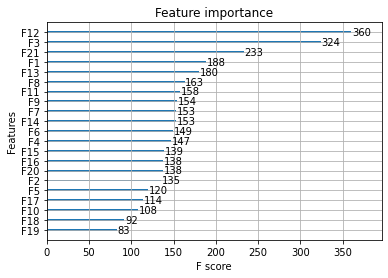

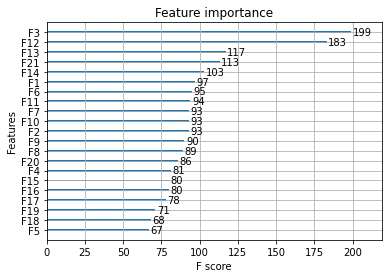

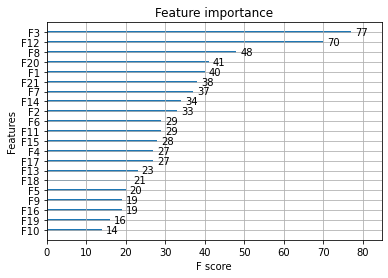

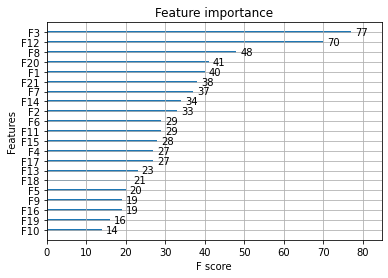

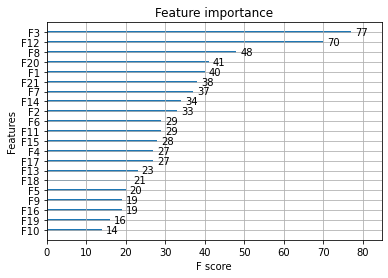

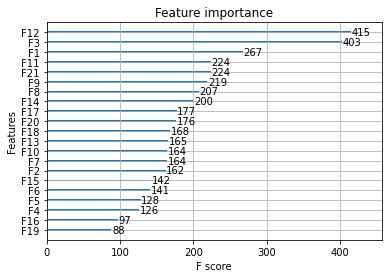

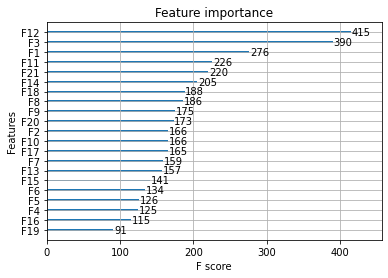

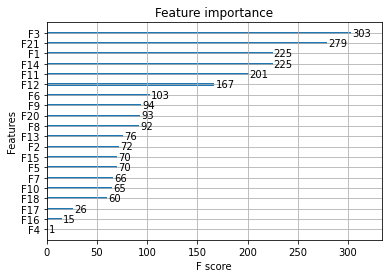

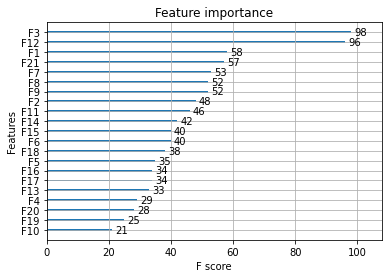

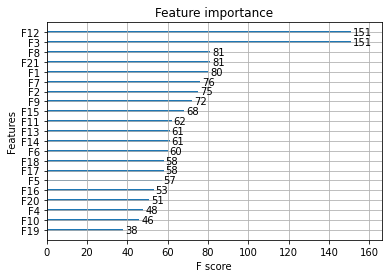

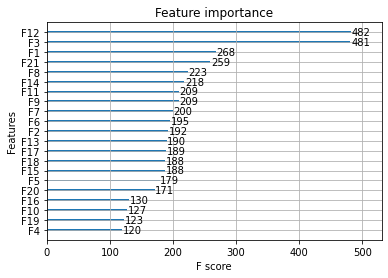

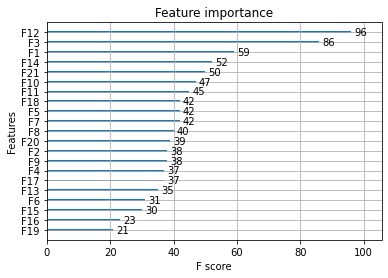

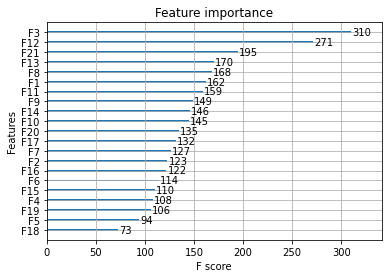

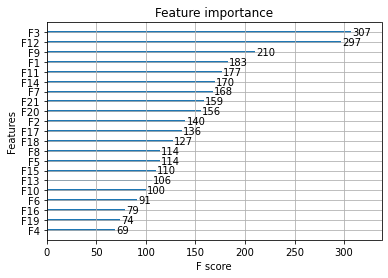

In [76]:
models = []
for index, row in results__.iterrows():
    if row['Model'] == 'XGBoost':
        xgb_model = row['best_estimator']
        key = row['Normalization & Outlier & Imputer']
        X_train, X_test, y_train, y_test = train_test_split(df_no_outliers[key].drop("Class", axis=1), df_no_outliers[key]["Class"], test_size=0.2, random_state=42)
        xgb_model.fit(X_train, y_train)
        xgb_classifier = xgb_model.named_steps['model']
        plot_importance(xgb_classifier.get_booster())
        plt.show()
        models.append({'Model': 'XGBoost', 'best_estimator': row['best_estimator'], 'key': key, 'model': xgb_model})


In [54]:
models

[{'Model': 'XGBoost', 'best_estimator': Pipeline(steps=[('model',
                   XGBClassifier(eta=0.5, gamma=0.1, learning_rate=0.05,
                                 max_depth=5, n_estimators=200))]), 'key': 'Local Outlier Factor Robust_KNN', 'model': Pipeline(steps=[('model',
                   XGBClassifier(eta=0.5, gamma=0.1, learning_rate=0.05,
                                 max_depth=5, n_estimators=200))])},
 {'Model': 'XGBoost', 'best_estimator': Pipeline(steps=[('model',
                   XGBClassifier(eta=0.5, gamma=0.0, learning_rate=0.15,
                                 max_depth=10))]), 'key': 'Local Outlier Factor Robust_Mean', 'model': Pipeline(steps=[('model',
                   XGBClassifier(eta=0.5, gamma=0.0, learning_rate=0.15,
                                 max_depth=10))])},
 {'Model': 'XGBoost', 'best_estimator': Pipeline(steps=[('model',
                   XGBClassifier(eta=0.1, gamma=0.3, learning_rate=0.3,
                                 max_depth=

## Saving Model

In [56]:
import joblib

for model in models:
    key = model['key']
    xgb_model = model['model']
    joblib.dump(xgb_model, f'model_{key}.pkl')

In [23]:
df_no_outliers['Local Outlier Factor Robust_KNN'].head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,0.0,-0.693305,-0.091910,0.479106,0.340257,0.764017,0.374406,-0.053095,-0.256560,-0.588570,1.0,0.785780,-1.117558,0.0,-0.257066,1.315636,-1.447219,-0.208082,-0.087754,0.500565,-0.233898,0
1,0.0,1.083756,1.145516,-0.181357,-0.211378,1.413533,-1.909861,0.099774,0.326878,0.567545,0.0,3.689662,-0.811313,0.0,-0.385723,0.451237,0.781141,0.541416,-0.276404,0.118666,-0.945763,1
3,-1.0,-0.340659,2.866126,-0.095726,-0.389021,-0.686294,0.483750,0.507481,-0.725007,0.362800,0.0,1.940855,-2.499871,0.0,0.628357,0.466051,0.464939,0.402460,-0.071656,-0.913838,-0.552542,1
4,-1.0,-0.115773,4.133514,-0.604215,0.628144,0.361964,-1.605858,0.462068,0.528668,-8.493407,1.0,-0.543097,-1.168130,1.0,-0.201229,-0.433347,0.395004,0.430171,-0.361975,-1.742010,-0.545763,1
5,-1.0,1.115517,4.575445,-0.348698,-1.095172,0.068009,0.229257,0.501403,-1.058421,-3.976432,0.0,0.424144,-0.945237,1.0,-0.347627,0.857391,0.266533,0.056074,0.206385,0.185028,-0.803390,1


# Prediction on Hold Out

### Part B

In [25]:
test_df = pd.read_csv('/content/drive/MyDrive/CE802_P2_Test.csv')
test_data = test_df.iloc[:,:-1].copy()
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,0,180.390,-2683.26,4.06290,-1803.74,15.6120,-2.91120,-4.69490,5917.88,35245.830,-3.82,9310.86,-2.4056,1,0.575200,-19.680,-1847.580,-5.50470,-5269.35,-17.4660,NaN
1,1,194.240,-4072.86,4.33670,-3023.74,10.2369,-5.88200,-6.92700,5736.56,35230.200,-3.82,9635.86,-3.0515,1,0.972600,43.020,-1468.340,-5.80050,-4922.25,-14.2803,NaN
2,1,169.770,-4311.36,4.12910,-2007.24,10.3749,-2.50970,-6.06100,4726.04,35438.730,-1.82,12595.26,-2.6240,1,0.133616,2.661,-1900.940,-4.73355,-3219.45,-17.2500,-48.54
3,0,183.254,-4332.98,3.84855,904.26,15.9840,-2.10121,-5.61200,-2835.76,35262.396,-1.82,8756.14,-2.4225,1,1.078600,6.540,-1894.500,-14.31600,-975.75,-17.1930,NaN
4,1,174.308,-4279.17,6.45200,-2712.87,11.0646,-2.27950,-4.47745,6893.64,35244.660,-3.82,8159.06,-3.3620,1,1.521000,-13.104,-1774.988,-5.68800,-4805.25,-15.2373,NaN


we apply each predictor on the test_data with the same normalization and imputation that it was trained on and aggregate after thresholding

In [116]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('/content/drive/MyDrive/CE802_P2_Test.csv')
# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()
outlier_methods = {'Isolation Forest': IsolationForest(), 'Robust covariance Estimator': EllipticEnvelope(), 'Local Outlier Factor': LocalOutlierFactor()}
normalization_methods = {'Standard': StandardScaler(), 'MinMax': MinMaxScaler(), 'Robust': RobustScaler()}
imputation_methods = {'KNN': KNNImputer(), 'Mean': SimpleImputer(strategy='mean'), 'Median': SimpleImputer(strategy='median')}
predictions_df = pd.DataFrame()
i = 0
# Loop through the models
for model in models:
    key = model['key']
    xgb_model = model['model']
    # Get the outlier method, normalization method, and imputation method from the key
    outlier_method_key = key.split()[0] + ' ' + key.split()[1] + ' ' + key.split()[2]
    normalization_method_key = key.split()[3].split('_')[0]
    imputation_method_key = key.split()[3].split('_')[1]
    # Fit the outlier method, normalization method, and imputation method on the test_data
    #outlier_method = outlier_methods[outlier_method_key]
    normalization_method = normalization_methods[normalization_method_key]
    imputation_method = imputation_methods[imputation_method_key]
    test_data_temp = test_data.copy()
    #test_data_temp = outlier_method.fit_transform(test_data_temp)
    test_data_temp = normalization_method.fit_transform(test_data_temp)
    test_data_temp = imputation_method.fit_transform(test_data_temp)
    tst_dt=pd.DataFrame(test_data_temp,columns=test_data.columns)
    predictions = xgb_model.predict(tst_dt)
    predictions_df['prediction_'+str(i)] = predictions
    i += 1


In [120]:
for column in predictions_df.columns:
    print(f"Value counts for column {column}: {predictions_df[column].value_counts()}")

1    569
0    431
Name: prediction_1, dtype: int64

To remove predictors that deviate far too much from the reality that was fed, we remove such predictors that behave abnormally.

## Thresholding Predictors

In [119]:
# Threshold for the value_counts difference
threshold = 250

# Get the value_counts of each column in predictions_df
value_counts = predictions_df.apply(lambda x: x.value_counts())

# Calculate the difference between the value_counts of each column
difference = value_counts.iloc[0] - value_counts.iloc[1]

# Get the column names where the difference is greater than the threshold
to_drop = difference[difference > threshold].index

# Drop the columns from predictions_df
predictions_df = predictions_df.drop(columns=to_drop)


In [122]:
for column in predictions_df.columns:
    print(f"Value counts for column {column}: {predictions_df[column].value_counts()}")

Value counts for column prediction_0: 1    550
0    450
Name: prediction_0, dtype: int64
Value counts for column prediction_1: 1    569
0    431
Name: prediction_1, dtype: int64
Value counts for column prediction_2: 1    512
0    488
Name: prediction_2, dtype: int64
Value counts for column prediction_3: 1    509
0    491
Name: prediction_3, dtype: int64
Value counts for column prediction_4: 1    509
0    491
Name: prediction_4, dtype: int64
Value counts for column prediction_5: 1    528
0    472
Name: prediction_5, dtype: int64
Value counts for column prediction_6: 1    536
0    464
Name: prediction_6, dtype: int64
Value counts for column prediction_11: 1    566
0    434
Name: prediction_11, dtype: int64
Value counts for column prediction_12: 1    565
0    435
Name: prediction_12, dtype: int64


In [123]:
predictions_df['majority_vote'] = predictions_df.mode(axis=1)[0]

In [128]:
predictions_df['majority_vote'].value_counts()

1    543
0    457
Name: majority_vote, dtype: int64

In [ ]:
# # Get the number of columns in predictions_df dataframe
# n_columns = len(predictions_df.columns) - 1
# # Define the weightage factors
# weightages = [1.5]*n_columns

# # Assign the weightages to the columns
# for i, column in enumerate(predictions_df.columns[:-1]):
#     predictions_df[column] = predictions_df[column]*weightages[i]

# # Create a new column to store the weighted majority vote
# predictions_df['weighted_majority_vote'] = predictions_df.sum(axis=1)
# # Add the weighted majority vote column to the test_data dataframe
# predictions_df['weighted_majority_vote'].head()

0    32.5
1    32.5
2    32.5
3    32.5
4    32.5
Name: weighted_majority_vote, dtype: float64

In [127]:
test_df.iloc[:,-1] = predictions_df['majority_vote']

In [129]:
# # Save to the destination file
test_df.to_csv('/content/drive/MyDrive/CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# # IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('/content/drive/MyDrive/CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('/content/drive/MyDrive/CE802_P2_Test_Predictions.csv').iloc[:,:-1])

In [130]:
test_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,0,180.390,-2683.26,4.06290,-1803.74,15.6120,-2.91120,-4.69490,5917.88,35245.830,-3.82,9310.86,-2.4056,1,0.575200,-19.680,-1847.580,-5.50470,-5269.35,-17.4660,NaN,1
1,1,194.240,-4072.86,4.33670,-3023.74,10.2369,-5.88200,-6.92700,5736.56,35230.200,-3.82,9635.86,-3.0515,1,0.972600,43.020,-1468.340,-5.80050,-4922.25,-14.2803,NaN,1
2,1,169.770,-4311.36,4.12910,-2007.24,10.3749,-2.50970,-6.06100,4726.04,35438.730,-1.82,12595.26,-2.6240,1,0.133616,2.661,-1900.940,-4.73355,-3219.45,-17.2500,-48.54,0
3,0,183.254,-4332.98,3.84855,904.26,15.9840,-2.10121,-5.61200,-2835.76,35262.396,-1.82,8756.14,-2.4225,1,1.078600,6.540,-1894.500,-14.31600,-975.75,-17.1930,NaN,0
4,1,174.308,-4279.17,6.45200,-2712.87,11.0646,-2.27950,-4.47745,6893.64,35244.660,-3.82,8159.06,-3.3620,1,1.521000,-13.104,-1774.988,-5.68800,-4805.25,-15.2373,NaN,0
